# Communicate Data Findings: Ford GoBike System Data

## Preliminary Wrangling

This document explores https://www.lyft.com/bikes/bay-wheels/system-data dataset. In this project, I will explore the data only for the year 2019. This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area. Multiple data files will be joined together as we desire a full year's coverage. This dataset is comprised of approximately 2,506,983 bike rides from year 2019.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import zipfile
import os
sb.set(style="darkgrid")

%matplotlib inline

Reading dataset by combining files for each month of year 2019.

In [2]:
# load in the dataset into a pandas dataframe, print statistics

curDir = os.getcwd()
path = './Dataset/'
all_files = os.listdir(path)
files = []
for text_file in all_files:    
    filename = path+text_file    
    df = pd.read_csv(filename)
    files.append(df)
df_bike = pd.concat(files) 

df_bike_copy =  df_bike.copy()   
print(df_bike_copy.shape)
df_bike_copy

e:\python3.7.4\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (14) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
e:\python3.7.4\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (13,14) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
e:\python3.7.4\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (13) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(2506983, 15)


,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip,rental_access_method
0,80825,2019-01-31 17:57:44.6130,2019-02-01 16:24:49.8640,229.0,Foothill Blvd at 42nd Ave,37.775745,-122.213037,196.0,Grand Ave at Perkins St,37.808894,-122.256460,4861,Subscriber,No,NaN
1,65900,2019-01-31 20:58:33.8860,2019-02-01 15:16:54.1730,4.0,Cyril Magnin St at Ellis St,37.785881,-122.408915,134.0,Valencia St at 24th St,37.752428,-122.420628,5506,Subscriber,No,NaN
2,62633,2019-01-31 18:06:52.9240,2019-02-01 11:30:46.5300,245.0,Downtown Berkeley BART,37.870139,-122.268422,157.0,65th St at Hollis St,37.846784,-122.291376,2717,Customer,No,NaN
3,44680,2019-01-31 19:46:09.7190,2019-02-01 08:10:50.3180,85.0,Church St at Duboce Ave,37.770083,-122.429156,53.0,Grove St at Divisadero,37.775946,-122.437777,4557,Customer,No,NaN
4,60709,2019-01-31 14:19:01.5410,2019-02-01 07:10:51.0650,16.0,Steuart St at Market St,37.794130,-122.394430,28.0,The Embarcadero at Bryant St,37.787168,-122.388098,2100,Customer,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150097,731,2019-12-28 18:37:29,2019-12-28 18:49:40,NaN,NaN,37.809731,-122.409855,NaN,NaN,37.807573,-122.421681,719651,Subscriber,NaN,app
150098,748,2019-12-28 18:37:24,2019-12-28 18:49:53,NaN,NaN,37.809768,-122.409797,NaN,NaN,37.807558,-122.421638,655411,Subscriber,NaN,app
150099,1044,2019-12-26 14:25:37,2019-12-26 14:43:02,NaN,NaN,37.810183,-122.410271,NaN,NaN,37.807225,-122.408850,936881,Subscriber,NaN,app
150100,326,2019-12-30 20:35:43,2019-12-30 20:41:09,NaN,NaN,37.810471,-122.417386,NaN,NaN,37.803143,-122.414373,397539,Subscriber,NaN,app


<i> As multiple files are combined so resetting the indexes. </i>

In [3]:
df_bike_copy.reset_index(drop=True,inplace=True)

In [4]:
df_bike_copy.index.duplicated().sum()

0

In [5]:
# Removing unnecessary columns
df_bike_copy.drop(['start_station_latitude','start_station_longitude','end_station_latitude','end_station_longitude'],axis=1,inplace=True)

In [6]:
# high-level overview of data shape and composition
print(df_bike_copy.shape)
print(df_bike_copy.dtypes)
df_bike_copy.head()

(2506983, 11)
duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
end_station_id             float64
end_station_name            object
bike_id                      int64
user_type                   object
bike_share_for_all_trip     object
rental_access_method        object
dtype: object


,duration_sec,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,bike_share_for_all_trip,rental_access_method
0,80825,2019-01-31 17:57:44.6130,2019-02-01 16:24:49.8640,229.0,Foothill Blvd at 42nd Ave,196.0,Grand Ave at Perkins St,4861,Subscriber,No,NaN
1,65900,2019-01-31 20:58:33.8860,2019-02-01 15:16:54.1730,4.0,Cyril Magnin St at Ellis St,134.0,Valencia St at 24th St,5506,Subscriber,No,NaN
2,62633,2019-01-31 18:06:52.9240,2019-02-01 11:30:46.5300,245.0,Downtown Berkeley BART,157.0,65th St at Hollis St,2717,Customer,No,NaN
3,44680,2019-01-31 19:46:09.7190,2019-02-01 08:10:50.3180,85.0,Church St at Duboce Ave,53.0,Grove St at Divisadero,4557,Customer,No,NaN
4,60709,2019-01-31 14:19:01.5410,2019-02-01 07:10:51.0650,16.0,Steuart St at Market St,28.0,The Embarcadero at Bryant St,2100,Customer,No,NaN


In [7]:
df_bike_copy.bike_id.nunique()

11070

### Structure of Dataset

There are 11070 bikes in this dataset with 2,506,983 rows and 11 features (duration, start_time, end_time, start_station_id, start_station_name,end_station_id, end_station_name, user_type, bike_share_for_all_trip,rental_access_method.)

### Interests in dataset

- Trends about average trip times.
- Monthly trends about total number of rides in a month of the year 2019.
- Monthly trends about duration of rides in a month of the year 2019.
- Does season effect riders?
- Trends about different type of users (Customer, Subscriber). 
- Which type of user have more duration time and why?
- Which are the most and least popular starting stations.
- Which are the most and least popular ending stations.
- Does starting and ending station have more number of Customers or Subscribers?

## Univariate Exploration

<i> Trends about average trip times. </i>

In [8]:
df_bike_copy['duration_sec'].describe()

count    2.506983e+06
mean     8.076483e+02
std      1.974714e+03
min      6.000000e+01
25%      3.590000e+02
50%      5.710000e+02
75%      8.870000e+02
max      9.121100e+05
Name: duration_sec, dtype: float64

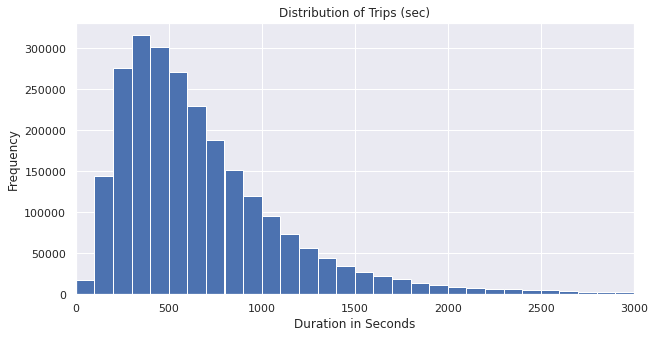

In [17]:
plt.figure(figsize=[10,5])
bins = np.arange(0, df_bike_copy['duration_sec'].max() + 100 , 100);
plt.hist(data = df_bike_copy , x = 'duration_sec' , bins = bins);
plt.xlim(0,3000);
plt.title('Distribution of Trips (sec)');
plt.xlabel('Duration in Seconds');
plt.ylabel('Frequency');

It is right skewed, so I am going to apply log transformation on and the duration is in seconds which correspond to a lot of points due to which the current bin size is 100 so to solve it I am going to convert the duration to minutes.

In [16]:
df_bike_copy['duration_min']=df_bike_copy['duration_sec']/60
bins = 10**np.arange(0, df_bike_copy['duration_min'].max() + 0.1 , 0.1);
ticks =  [ 0.3 , 1 , 3, 10, 30, 100, 300];
labels = ['{}'.format(v) for v in ticks];
df_bike_copy['duration_min']=df_bike_copy['duration_min'].astype(int)

e:\python3.7.4\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in power
  


/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:1269: RuntimeWarning: invalid value encountered in subtract
  a = op(a[slice1], a[slice2])
/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6692: RuntimeWarning: invalid value encountered in multiply
  boffset = -0.5 * dr * totwidth * (1 - 1 / nx)
/usr/local/lib/python3.6/dist-packages/numpy/ma/core.py:6759: RuntimeWarning: overflow encountered in power
  result = np.where(m, fa, umath.power(fa, fb)).view(basetype)


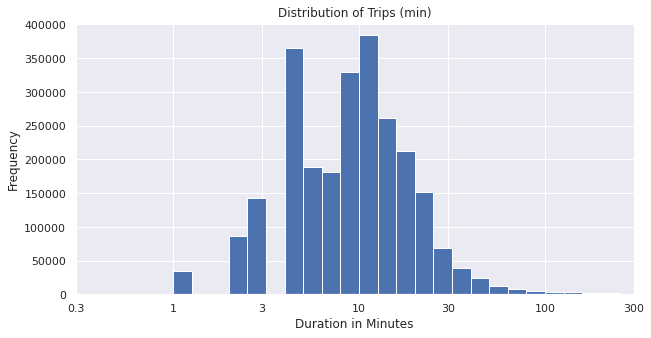

In [23]:
plt.figure(figsize=[10,5]);
plt.hist(data = df_bike_copy , x = 'duration_min' , bins = bins);
plt.xscale('log');
plt.xticks(ticks,labels);
plt.title('Distribution of Trips (min)');
plt.xlabel('Duration in Minutes');
plt.ylabel('Frequency');

<i> After applying log transformation </i>

Now, let get insight about it's monthly trends. first convert 'start_time' date to datetime format a create a new month column.

In [9]:
df_bike_copy['start_time']=pd.to_datetime(df_bike_copy['start_time'])

In [10]:
df_bike_copy['month']=pd.DatetimeIndex(df_bike_copy['start_time']).month 

In [11]:
df_bike_copy.month.value_counts()

7     258102
3     256299
10    239895
4     239111
9     217986
8     210563
1     192082
6     191772
11    185496
2     183412
5     182163
12    150102
Name: month, dtype: int64

In [12]:
base_color=sb.color_palette()[0]

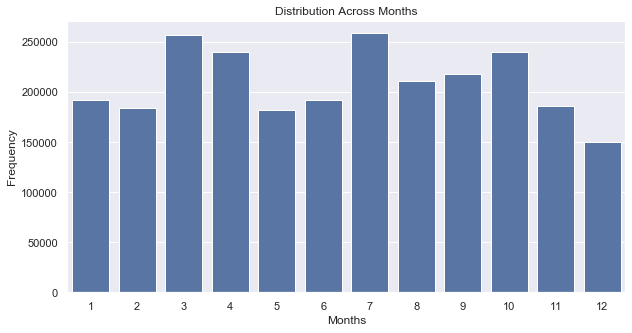

In [0]:
plt.figure(figsize=[10,5]);
base_color=sb.color_palette()[0]
sb.countplot(data = df_bike_copy , x = 'month',color=base_color);
plt.title('Distribution Across Months');
plt.xlabel('Months');
plt.ylabel('Frequency');

<i> We can see that the trend tends to decrease in winter season. </i>

Let's visualize the count of different user types.

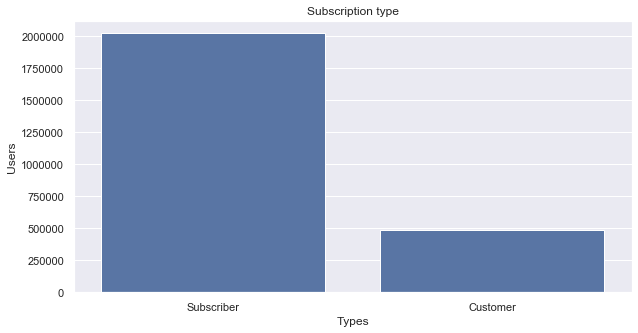

In [0]:
plt.figure(figsize=[10,5]);
base_color=sb.color_palette()[0]
sb.countplot(data = df_bike_copy ,x='user_type',color=base_color);
plt.title('Subscription type');
plt.xlabel('Types');
plt.ylabel('Users');

<i> There are a lot of subscriber user type as compared to customer. </i>

<i> Most popular start station</i>

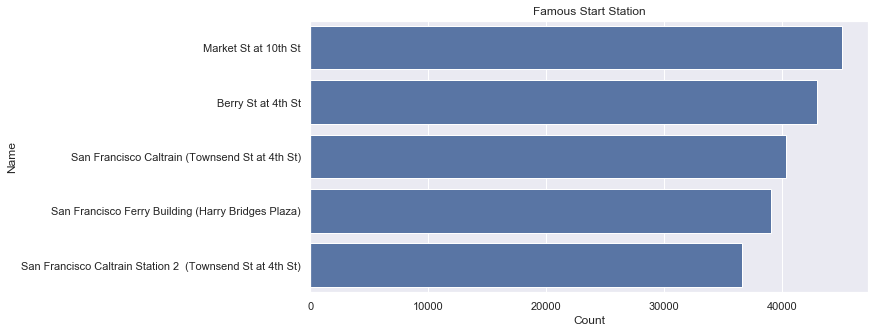

In [13]:
plt.figure(figsize=[10,5]);
sb.countplot(data = df_bike_copy ,y='start_station_name',order=df_bike_copy.start_station_name.value_counts().iloc[0:5].index
             ,color=base_color);
plt.title('Famous Start Station');
plt.ylabel('Name');
plt.xlabel('Count');

<i> Least popular start station </i>

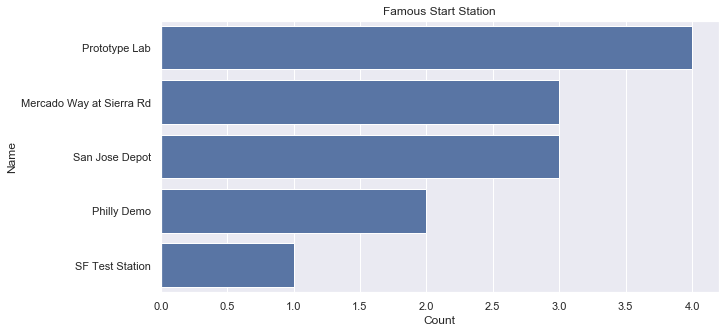

In [14]:
plt.figure(figsize=[10,5]);
sb.countplot(data = df_bike_copy ,y='start_station_name',order=df_bike_copy.start_station_name.value_counts().iloc[-5:].index
             ,color=base_color);
plt.title('Famous Start Station');
plt.ylabel('Name');
plt.xlabel('Count');

<i> Most popular end station </i>

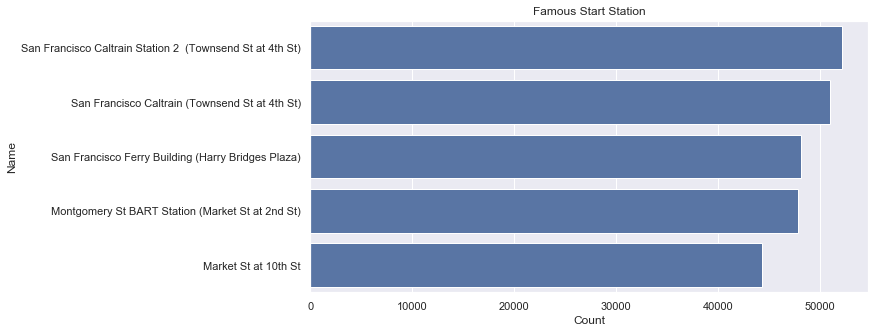

In [15]:
plt.figure(figsize=[10,5]);
sb.countplot(data = df_bike_copy ,y='end_station_name',order=df_bike_copy.end_station_name.value_counts().iloc[0:5].index
             ,color=base_color);
plt.title('Famous Start Station');
plt.ylabel('Name');
plt.xlabel('Count');

<i> Least popular end station </i>

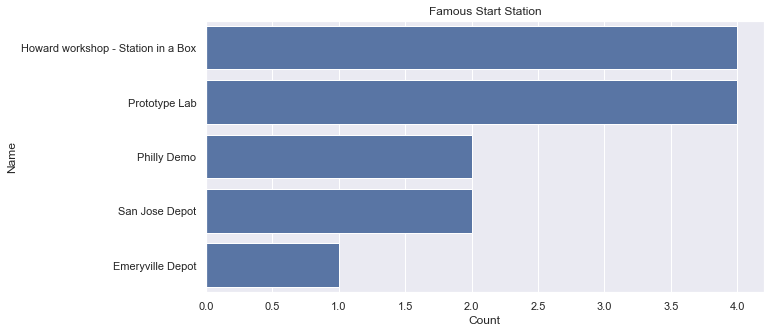

In [16]:
plt.figure(figsize=[10,5]);
sb.countplot(data = df_bike_copy ,y='end_station_name',order=df_bike_copy.end_station_name.value_counts().iloc[-5:].index
             ,color=base_color);
plt.title('Famous Start Station');
plt.ylabel('Name');
plt.xlabel('Count');

## Bivariate Exploration

To start off with, I want to look at the pairwise correlations present between features in the data.

#### <i> Monthly trends about total number of rides in a month of the year 2019. </i>

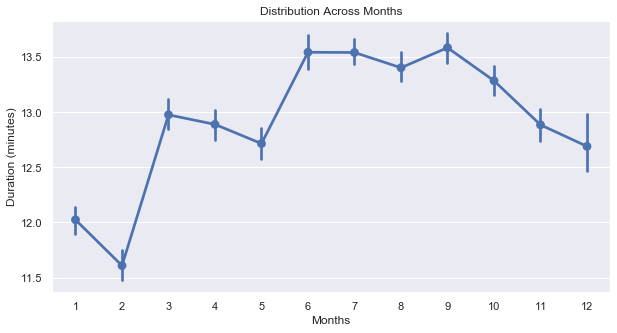

In [0]:
plt.figure(figsize=[10,5]);
sb.pointplot(data = df_bike_copy , x = 'month',y='duration_min',color=base_color);
plt.title('Distribution Across Months');
plt.xlabel('Months');
plt.ylabel('Duration (minutes)');

<i> In winter season, the riders tend to ride for shorter duration </i>

<i>  </i>

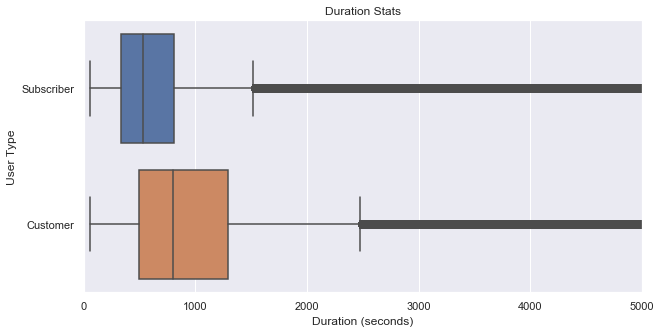

In [17]:
plt.figure(figsize=[10,5]);
sb.boxplot(data = df_bike_copy , x = 'duration_sec',y='user_type');
plt.title('Duration Stats');
plt.xlim([0,5000]);
plt.ylabel('User Type');
plt.xlabel('Duration (seconds)');

## Multivariate Exploration

#### <i> Type of user in different months </i>

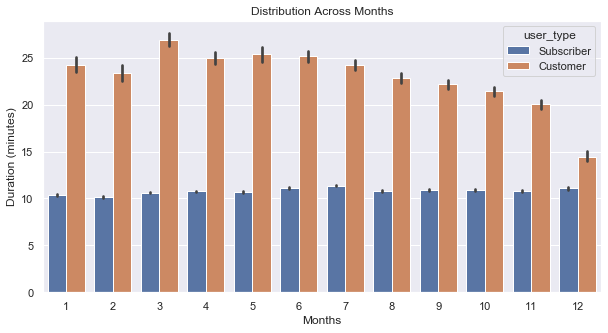

In [0]:
plt.figure(figsize=[10,5]);
sb.barplot(data = df_bike_copy , x = 'month',y='duration_min',hue='user_type');
plt.title('Distribution Across Months');
plt.xlabel('Months');
plt.ylabel('Duration (minutes)');

<i> From this visualization we can see a strange behaviour in dataset that the number of subscribers are more but the duration of customers is more by which we can infer that subscriber use the vehicle for short duration maybe to perform some daily life task but the customer don't use it frequently but when they do they do it for a long drive. </i>

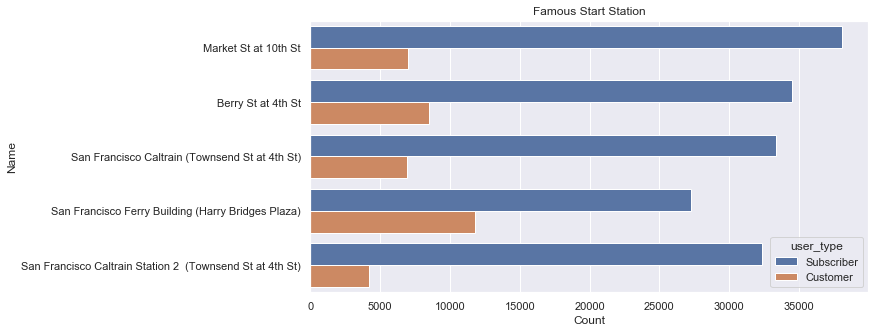

In [18]:
plt.figure(figsize=[10,5]);
sb.countplot(data = df_bike_copy ,y='start_station_name',hue='user_type',order=df_bike_copy.start_station_name.value_counts().iloc[0:5].index);
plt.title('Famous Start Station');
plt.ylabel('Name');
plt.xlabel('Count');

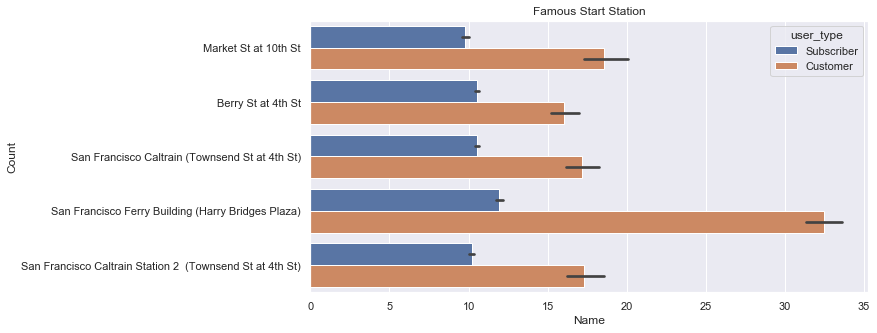

In [25]:
plt.figure(figsize=[10,5]);
sb.barplot(data = df_bike_copy ,x='duration_min',y='start_station_name',hue='user_type',order=df_bike_copy.start_station_name.value_counts().iloc[0:5].index);
plt.title('Famous Start Station');
plt.xlabel('Name');
plt.ylabel('Count');

Above two visualization show number of rides and the duration of rides and we can notice that duration for customer is more.

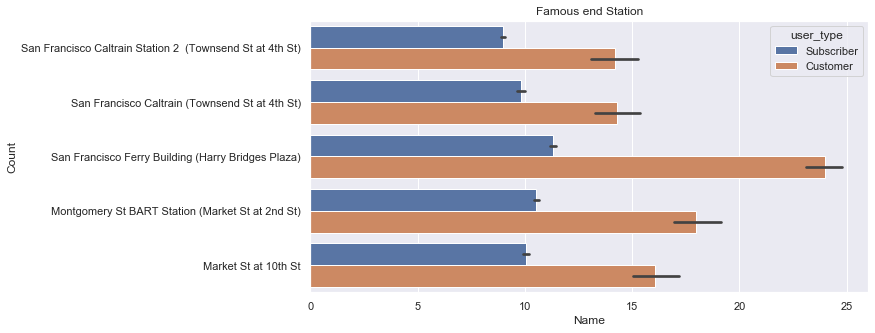

In [27]:
plt.figure(figsize=[10,5]);
sb.barplot(data = df_bike_copy,x='duration_min',y='end_station_name',hue='user_type',order=df_bike_copy.end_station_name.value_counts().iloc[0:5].index);
plt.title('Famous end Station');
plt.xlabel('Name');
plt.ylabel('Count');

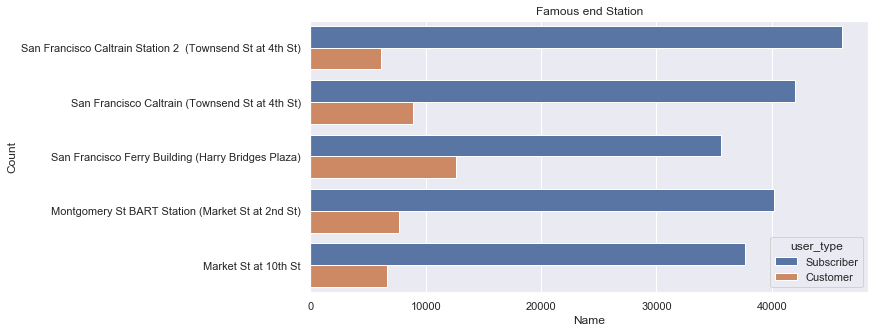

In [24]:
plt.figure(figsize=[10,5]);
sb.countplot(data = df_bike_copy ,y='end_station_name',hue='user_type',order=df_bike_copy.end_station_name.value_counts().iloc[0:5].index);
plt.title('Famous end Station');
plt.xlabel('Name');
plt.ylabel('Count');

### Were there any interesting or surprising interactions between features?

The most interesting feature in this dataset is that there are far more subscribers than customer but the duration time of customers are more than the duration of subscribers.